In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startup-funding/startup_funding.csv


In [40]:
df=pd.read_csv("/kaggle/input/indian-startup-funding/startup_funding.csv")
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [41]:
df["Investors Name"]

0                 Tiger Global Management
1               Susquehanna Growth Equity
2                   Sequoia Capital India
3                          Vinod Khatumal
4                 Sprout Venture Partners
                      ...                
3039          Asia Pacific Internet Group
3040                       KARSEMVEN Fund
3041       Exfinity Fund, GrowX Ventures.
3042                           MakeMyTrip
3043    UK based Group of Angel Investors
Name: Investors Name, Length: 3044, dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [43]:
# df['Investors Name']=df['Investors Name'].fillna("Undisclosed")
# sorted(df['Investors Name'].unique().tolist())

In [44]:
#sorted(df['Investors Name'].unique().tolist())

In [45]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [47]:
df.drop(columns=['Remarks'],inplace=True)
df.set_index("Sr No",inplace=True)


df.rename(columns={
    "Date dd/mm/yyyy":"date",
    "Startup Name":"startup",
    "Industry Vertical":"vertical",
    "SubVertical":"subvertical ",
    "City  Location":"city",
    "Investors Name":"investors",
    "InvestmentnType":"round",
    "Amount in USD":"amount"
},inplace = True)

df['amount']=df['amount'].fillna("0")
df['amount']=df['amount'].str.replace(',','')
df['amount']=df['amount'].str.replace('undisclosed','0')
df['amount']=df['amount'].str.replace('unknown','0')
df['amount']=df['amount'].str.replace('Undisclosed','0')
df['amount']=df['amount'].str.replace('+','')


df=df[df['amount'].str.isdigit()]
df.info()
df['amount']=df['amount'].astype('float')

#doller to inr in cr
def to_inr(dollar):
    inr=dollar * 88.77
    return inr/10000000


df['amount']=df['amount'].apply(to_inr)
df['date']=pd.to_datetime(df['date'],errors='coerce')
df = df.dropna(subset=['startup','city','investors','round','amount'])


<class 'pandas.core.frame.DataFrame'>
Index: 3030 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          3030 non-null   object
 1   startup       3030 non-null   object
 2   vertical      2859 non-null   object
 3   subvertical   2105 non-null   object
 4   city          2850 non-null   object
 5   investors     3006 non-null   object
 6   round         3028 non-null   object
 7   amount        3030 non-null   object
dtypes: object(8)
memory usage: 213.0+ KB


In [48]:
df1=df

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2824 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1202 non-null   datetime64[ns]
 1   startup       2824 non-null   object        
 2   vertical      2824 non-null   object        
 3   subvertical   2079 non-null   object        
 4   city          2824 non-null   object        
 5   investors     2824 non-null   object        
 6   round         2824 non-null   object        
 7   amount        2824 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.6+ KB


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2824 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1202 non-null   datetime64[ns]
 1   startup       2824 non-null   object        
 2   vertical      2824 non-null   object        
 3   subvertical   2079 non-null   object        
 4   city          2824 non-null   object        
 5   investors     2824 non-null   object        
 6   round         2824 non-null   object        
 7   amount        2824 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.6+ KB


In [51]:
len(df['investors'].str.split(",").sum())

5431

In [52]:
sorted(set(df['investors'].str.split(",").sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [53]:
df[df['investors'].str.contains("IDG Venture")].head()[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,NaT,Tripoto,Social Media,New Delhi,Series B,31.880636
223,NaT,Cure Fit,Consumer Internet,Bengaluru,Private Equity,1065.240000
253,NaT,Sigtuple,Healthcare,Bengaluru,Private Equity,168.663000
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,195.294000
310,NaT,POPxo,Technology,Delhi,Private Equity,48.823500


In [54]:
df[df['investors'].str.contains("IDG Venture")].head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
102,NaT,Tripoto,Social Media,Travel,New Delhi,"Orchid India, Hornbill Orchid India Fund, Chir...",Series B,31.880636
223,NaT,Cure Fit,Consumer Internet,Health and fitness Platform,Bengaluru,"IDG Ventures, Accel Partners, Kalaari Capital ...",Private Equity,1065.240000
253,NaT,Sigtuple,Healthcare,Data Driven Intelligence Solutions Platform,Bengaluru,"Accel Partners, IDG Venture, Endiya Partners, ...",Private Equity,168.663000
259,2018-02-05,Bizongo,Consumer Internet,Aggregator For Packaging Material,Mumbai,"B Capital, International Finance Corporation (...",Private Equity,195.294000
310,NaT,POPxo,Technology,Women Focussed Digital Media Platform,Delhi,"Neoplux, OPPO, IDG Ventures India, Kalaari Cap...",Private Equity,48.823500


In [55]:
df[df['investors'].str.contains("IDG Venture")].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Cure Fit                 1065.240000
Lenskart                  532.620000
Bizongo                   221.925000
CureFit                   221.925000
Sigtuple                  220.149600
Curefit                   133.155000
Fintellix                 133.155000
Xpressbees                110.962500
FirstCry.com               88.770000
Uniphore                   78.117600
POPxo                      76.342200
HealthifyMe                53.262000
\\xc2\\xa0CloudCherry      53.262000
Flyrobe                    47.048100
RentMojo                   44.385000
Aasaanjobs                 44.385000
Vayana                     35.508000
Agrostar                   35.508000
PlaySimple                 35.508000
Blowhorn                   32.401050
Tripoto                    31.880636
Active.ai                  26.631000
Heckyl                     23.967900
CreditMantri               22.192500
eShakti                    20.417100
Zimmber                    17.754000
POPxo.com                  17.

<Axes: ylabel='amount'>

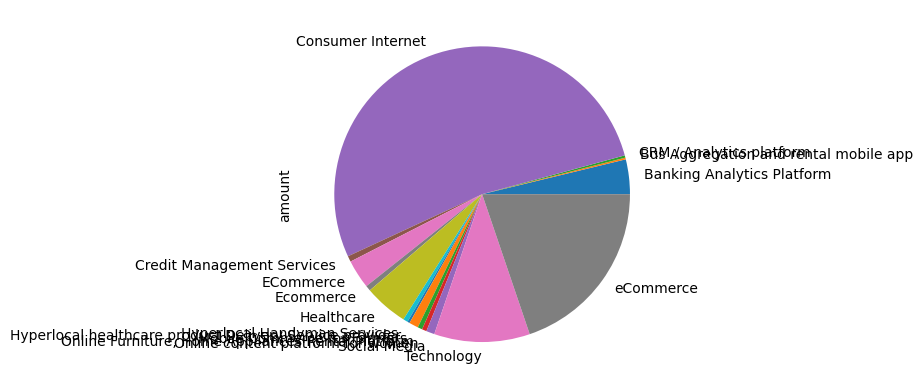

In [56]:
df[df['investors'].str.contains("IDG Venture")].groupby("vertical")['amount'].sum().plot(kind='pie')

In [57]:
df.columns

Index(['date', 'startup', 'vertical', 'subvertical ', 'city', 'investors',
       'round', 'amount'],
      dtype='object')

<Axes: ylabel='amount'>

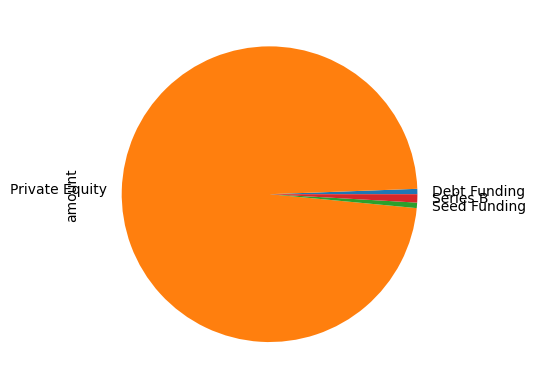

In [58]:
df[df['investors'].str.contains("IDG Venture")].groupby("round")['amount'].sum().plot(kind='pie')

In [59]:
df['month']=df['date'].dt.month

In [60]:
df['year']=df['date'].dt.year

In [61]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,startup,vertical,subvertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1775.400000,9.0,2020.0
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,71.445594,NaN,NaN
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,162.971600,9.0,2020.0
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.631000,2.0,2020.0
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.978600,2.0,2020.0
...,...,...,...,...,...,...,...,...,...,...
2869,NaT,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,31.069500,NaN,NaN
2870,NaT,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,NaN,NaN
2871,NaT,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.550800,NaN,NaN


In [62]:
df.groupby(['year','month'])['startup'].count().reset_index()

,year,month,startup
0,2015.0,1.0,35
1,2015.0,2.0,14
2,2015.0,3.0,36
3,2015.0,4.0,21
4,2015.0,5.0,22
...,...,...,...
57,2019.0,11.0,5
58,2019.0,12.0,5
59,2020.0,2.0,2
60,2020.0,9.0,2


In [63]:
df.groupby(['year','month'])['amount'].sum().reset_index()

,year,month,amount
0,2015.0,1.0,5675.509950
1,2015.0,2.0,1686.283797
2,2015.0,3.0,2055.868815
3,2015.0,4.0,2083.831365
4,2015.0,5.0,880.021395
...,...,...,...
57,2019.0,11.0,1241.004600
58,2019.0,12.0,1327.111500
59,2020.0,2.0,42.609600
60,2020.0,9.0,1938.371600


In [64]:

temp_df=df.groupby(['year','month'])['amount'].count().reset_index()

In [65]:
temp_df['x_axis']=temp_df['month'].astype('str') + "-" +temp_df['year'].astype('str')

In [66]:
temp_df

,year,month,amount,x_axis
0,2015.0,1.0,35,1.0-2015.0
1,2015.0,2.0,14,2.0-2015.0
2,2015.0,3.0,36,3.0-2015.0
3,2015.0,4.0,21,4.0-2015.0
4,2015.0,5.0,22,5.0-2015.0
...,...,...,...,...
57,2019.0,11.0,5,11.0-2019.0
58,2019.0,12.0,5,12.0-2019.0
59,2020.0,2.0,2,2.0-2020.0
60,2020.0,9.0,2,9.0-2020.0


In [67]:
temp_df[['amount','x_axis']]

,amount,x_axis
0,35,1.0-2015.0
1,14,2.0-2015.0
2,36,3.0-2015.0
3,21,4.0-2015.0
4,22,5.0-2015.0
...,...,...
57,5,11.0-2019.0
58,5,12.0-2019.0
59,2,2.0-2020.0
60,2,9.0-2020.0


In [68]:
round_df=df.groupby('round')['amount'].sum().sort_values(ascending=False).head(10)

In [69]:
round_df

round
Private Equity          220179.721126
Series B                 42468.333508
Series D                 13153.929723
Series C                  9273.965184
Funding Round             8877.000000
Seed Funding              4809.405987
Private Equity Round      4491.762000
Series G                  2050.587000
Series A                  1803.806400
Seed Round                1738.116600
Name: amount, dtype: float64

In [70]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,startup,vertical,subvertical,city,investors,round,amount,month,year
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1775.400000,9.0,2020.0
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,71.445594,NaN,NaN
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,162.971600,9.0,2020.0
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,26.631000,2.0,2020.0
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.978600,2.0,2020.0
...,...,...,...,...,...,...,...,...,...,...
2869,NaT,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,31.069500,NaN,NaN
2870,NaT,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,NaN,NaN
2871,NaT,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.550800,NaN,NaN


In [71]:
city_df = df.groupby('city')['amount'].sum().sort_values(ascending=False).head(10)

In [72]:
city_df

city
Bangalore     100847.940635
Bengaluru      62959.334711
Mumbai         38247.353563
New Delhi      26789.160399
Gurgaon        26634.605473
Noida          11210.443728
Gurugram        7686.883007
Chennai         6380.494659
Pune            5619.868914
Menlo Park      3994.650000
Name: amount, dtype: float64

In [73]:
top_overall = df.groupby('startup')['amount'].sum().sort_values(ascending=False).head(10)
top_overall

startup
Flipkart            36037.95690
Rapido Bike Taxi    34620.30000
Paytm               27953.22915
Ola                  8739.40650
Udaan                7722.99000
Snapdeal             6213.90000
Flipkart.com         6213.90000
Ola Cabs             5944.92690
BigBasket            4500.63900
GOQii                3994.65000
Name: amount, dtype: float64

In [74]:
investor_series = (
        df.assign(investors=df['investors'].str.split(','))
          .explode('investors')
          .groupby('investors')['amount']
          .sum()
          .sort_values(ascending=False)
          .head(10)
    )

In [75]:
investor_series

investors
Westbridge Capital      34620.30000
Softbank                25033.14000
SoftBank Group          16085.12400
 Tiger Global           13961.30175
 Tencent Holdings       12427.80000
 eBay                   12427.80000
Microsoft               12427.80000
 DST Global              9693.68400
Vijay Shekhar Sharma     8887.20855
Alibaba                  8877.00000
Name: amount, dtype: float64

In [76]:
heatmap_df = df.groupby(['year', 'month'])['amount'].sum().unstack(fill_value=0)
heatmap_df

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
year,,,,,,,,,,,,
2015.0,5675.509950,1686.283797,2055.868815,2083.831365,880.021395,2519.026290,2667.09465,6043.017750,845.409972,1631.281905,1076.336250,854.943870
2016.0,331.964292,619.769948,706.165350,1440.559560,981.822831,196.705443,2994.56718,493.472430,715.042350,587.879325,2747.511393,1748.085471
2017.0,3849.067200,235.329270,4224.564300,937.375692,1103.260191,1692.755130,3509.16687,1075.049085,553.844907,525.900111,23004.869778,1032.927720
2018.0,5419.754659,400.615459,2326.297743,763.137936,1959.597750,1807.357200,1593.42150,2424.308700,300.663990,1140.135249,443.397273,1794.708265
2019.0,3473.614485,5827.750500,1575.667500,6038.135400,492.673500,1321.506562,0.00000,2040.854302,8.877000,1772.578712,1241.004600,1327.111500
2020.0,0.000000,42.609600,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1938.371600,1331.550000,0.000000,0.000000
